In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [2]:
# Reading data
df = pd.read_csv('NoBroker Interactions//property_photos.tsv', delimiter='\t')
data_interactions = pd.read_csv('NoBroker Interactions//property_interactions.csv')
data_set = pd.read_csv('NoBroker Interactions//property_data_set.csv')

In [3]:
# Calculating count of images

df['photo_count'] = 0
for index,row in df.iterrows():
    urls_list = df['photo_urls'][index]
    if urls_list =="[]":
        df['photo_count'][index] = 0
        continue
    try:
        urls_list = urls_list[:-1]
        urls_list = urls_list.replace('t','"t',1)
        urls_list = '"'+urls_list+'"'
        photo_urls_list = json.loads(urls_list)
        photo_urls_list = json.loads(photo_urls_list)
        # for photo in photo_urls_list:
        #     df[photo['title']] = 0
        #     df['photo_count'][index] = len(photo_urls_list)
    except:
        df['photo_count'][index] = 0

/home/venkatakrishna/anaconda3/envs/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/venkatakrishna/anaconda3/envs/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [4]:
# Calculating number of interactions
data_interactions_count = data_interactions.groupby(['property_id']).apply(
        lambda x: pd.Series(dict(
            number_of_interaction=int((x['request_date']).count())
        )))

In [5]:
# Merging data

result_data = pd.merge(df, data_set, on='property_id', how='inner')
final_result_data = pd.merge(result_data, data_interactions_count, on='property_id', how='left')

In [6]:
# Cleaning data
# Removing unnecessary columns
final_result_data['number_of_interaction'] = final_result_data['number_of_interaction'].map(lambda x: 0 if isinstance(x,str) else x)
final_result_data = final_result_data.drop(columns=['latitude','longitude'])

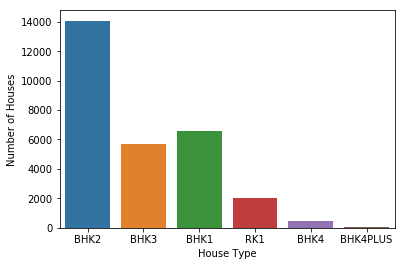

In [18]:
# Visualization

numericals = ['rent','deposit','property_age','property_size']
categoricals = ['type','bathroom','floor','total_floor','furnishing','gym','lease_type','lift','parking','swimming_pool','building_type']
# Categorical Visualizations single plot
# Bar Plot
irrevalent_categories = ['property_id','request_data','activation_date','photo_urls']

sb.countplot(final_result_data['type']).set(xlabel='House Type',ylabel='Number of Houses')

plt.show()

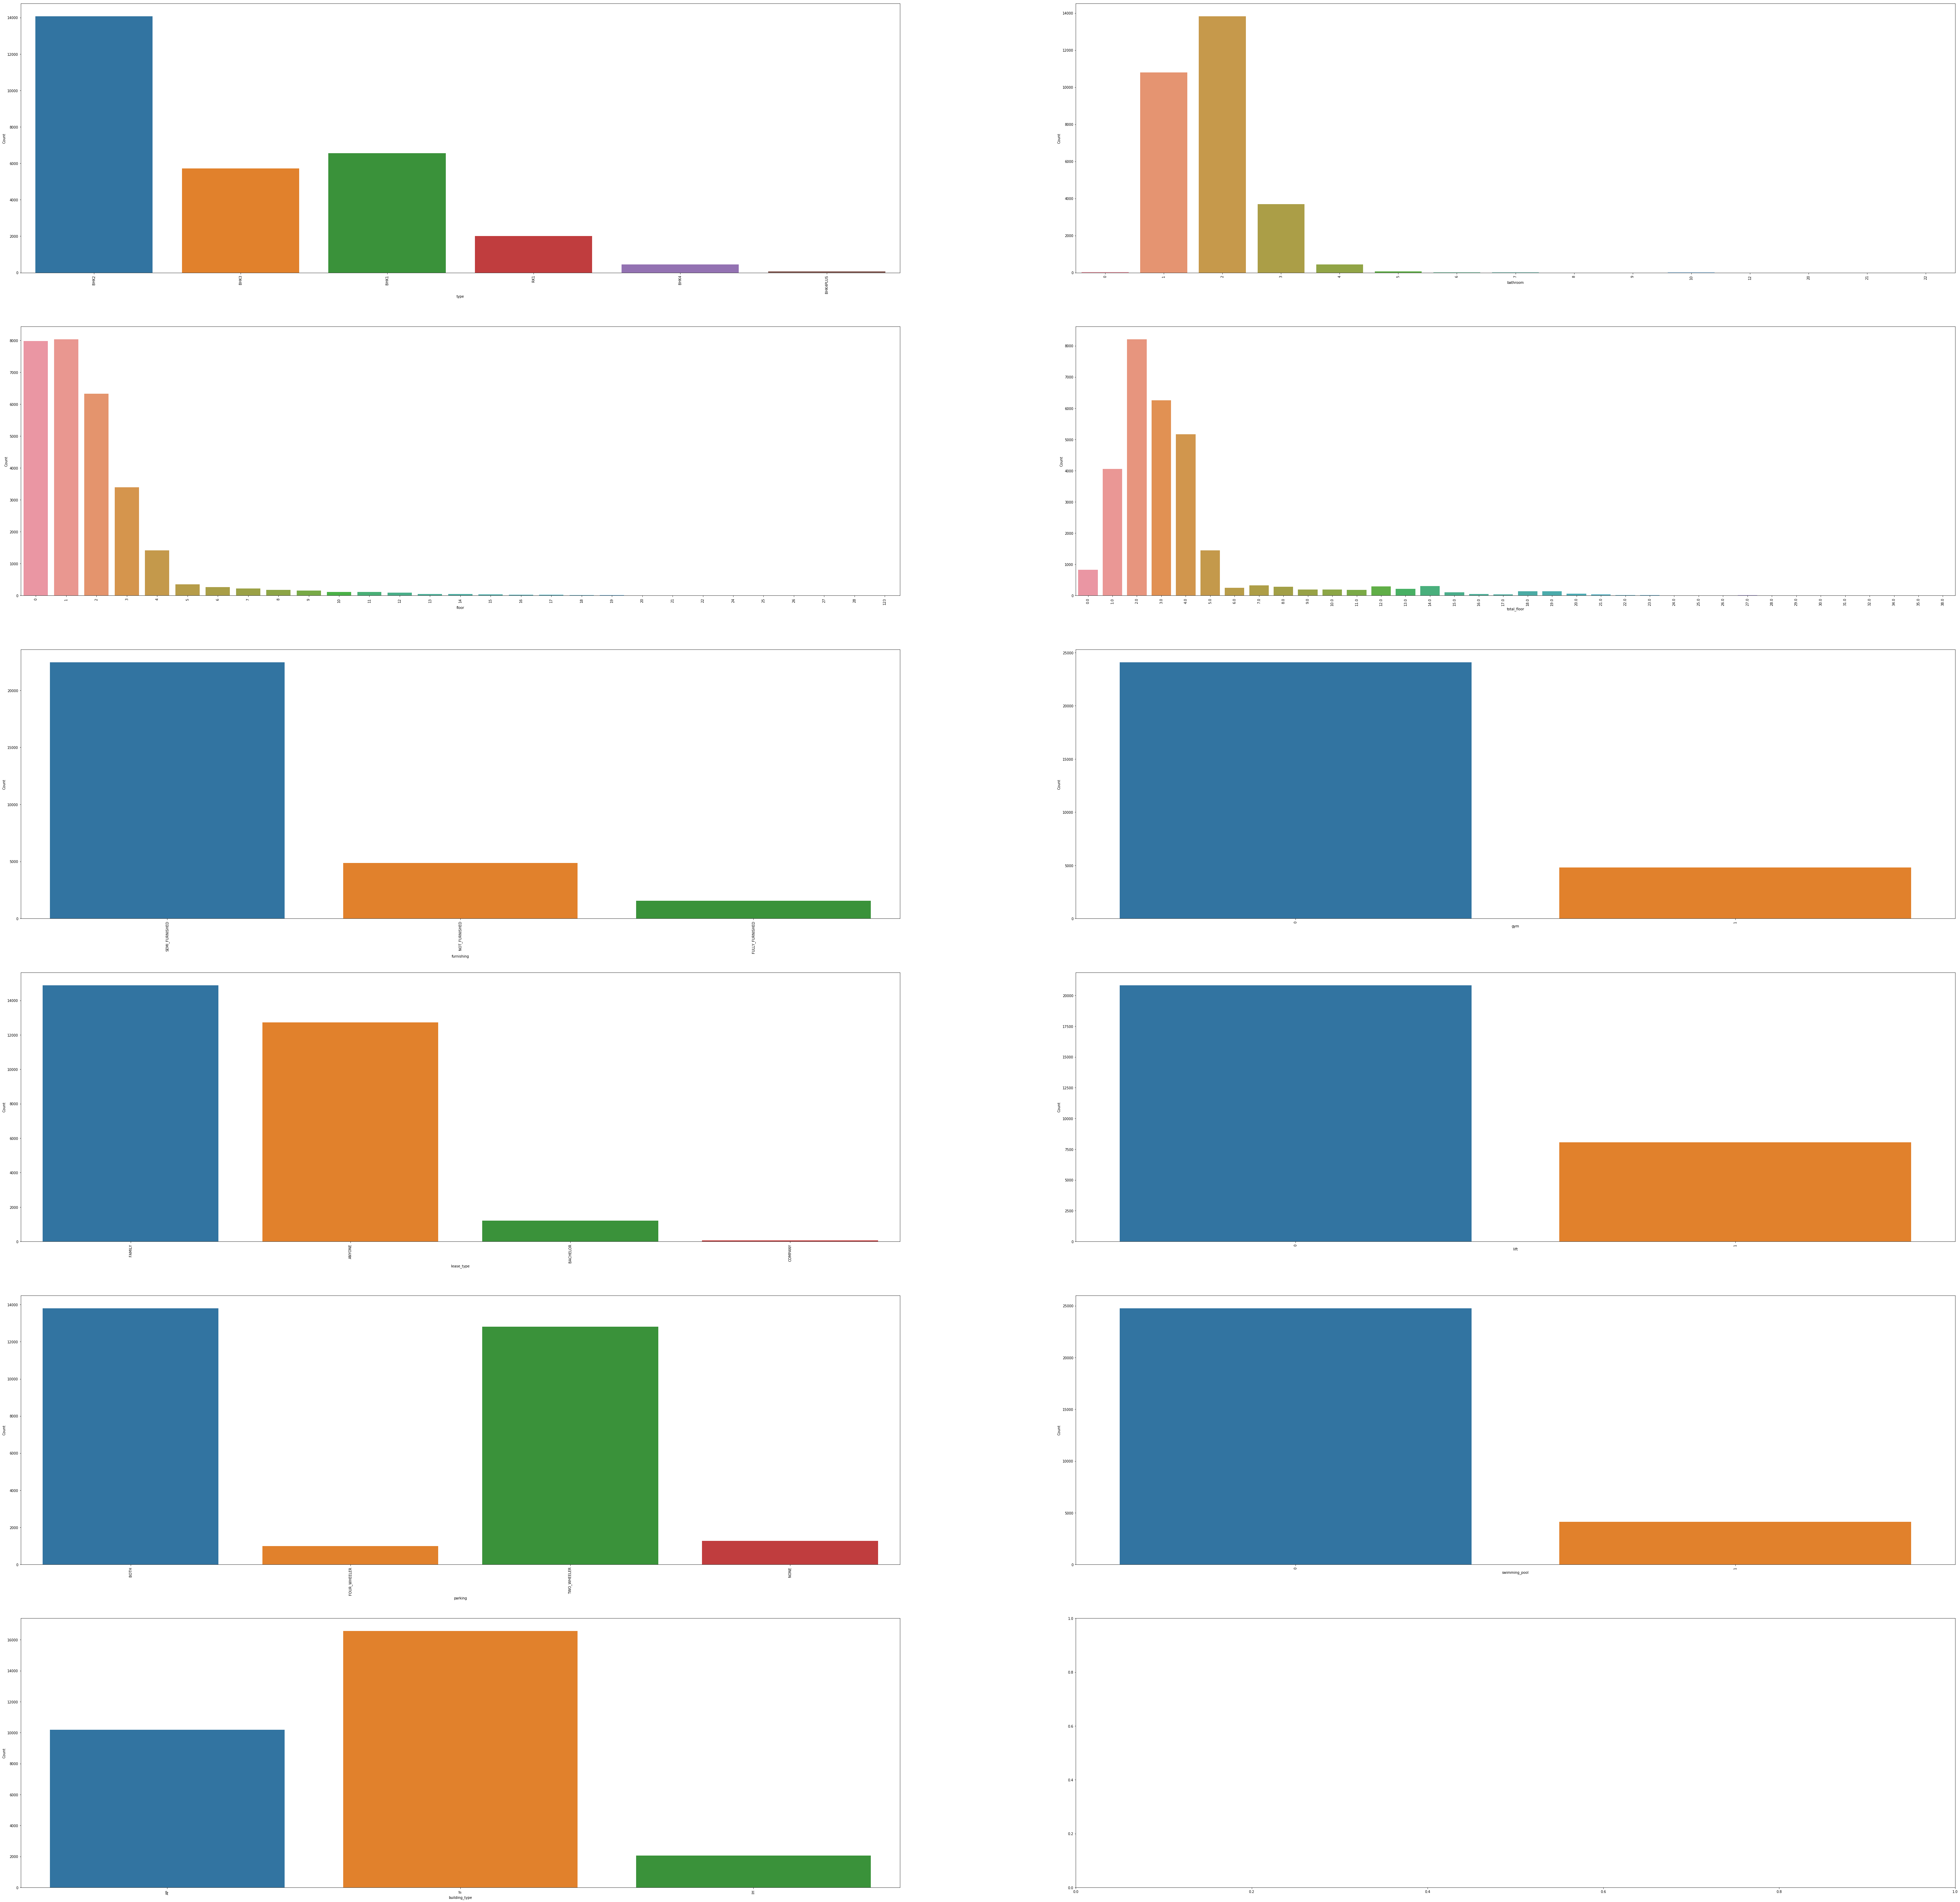

In [19]:
# Categorical Visualizations multi plots
# Bar Plot

fig, ax = plt.subplots(6, 2, figsize=(100, 100))
for variable, subplot in zip(categoricals, ax.flatten()):
    sb.countplot(final_result_data[variable], ax=subplot).set(xlabel=variable, ylabel='Count')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.show()

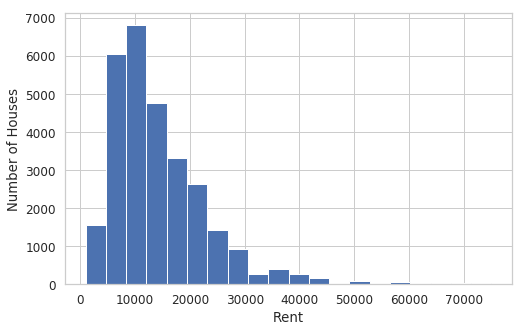

In [20]:
# Numerical Visualizations single plot
# Histograms

sb.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sb.distplot(
    final_result_data['rent'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Rent', ylabel='Number of Houses')
plt.show()

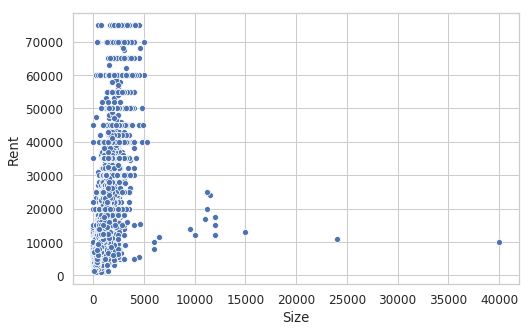

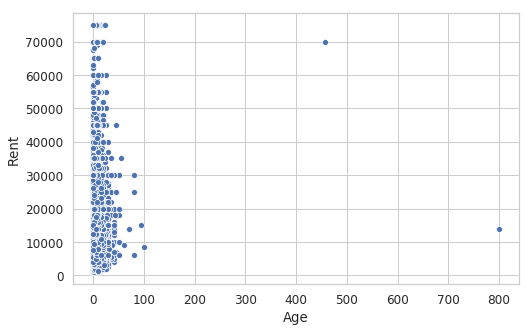

In [21]:
# Numerical variable vs Numerical variable
# Scatter plot

sb.scatterplot(x=final_result_data['property_size'], y=final_result_data['rent']).set(xlabel='Size',ylabel='Rent')
plt.show()

sb.scatterplot(x=final_result_data['property_age'], y=final_result_data['rent']).set(xlabel='Age', ylabel='Rent')
plt.show()

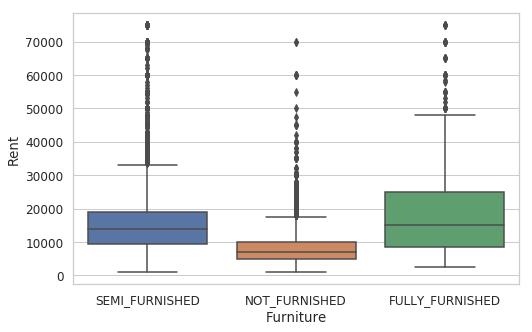

In [22]:
# Categorical vs Numerical variables
# Box-and-whisker plots

sb.boxplot(x='furnishing', y='rent', data=final_result_data).set(xlabel='Furniture', ylabel='Rent')
plt.show()

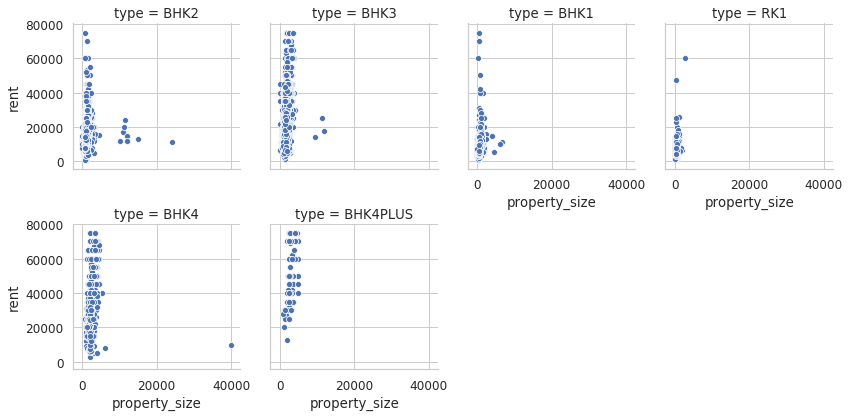

In [23]:
# Multi variable plots

cond_plot = sb.FacetGrid(data=final_result_data, col='type', col_wrap=4)
cond_plot.map(sb.scatterplot, 'property_size', 'rent')

plt.show()

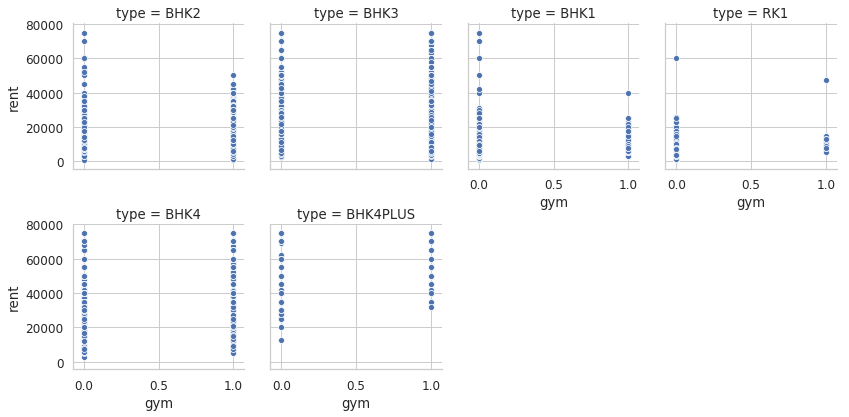

In [24]:
# Multi variable plots

cond_plot = sb.FacetGrid(data=final_result_data, col='type', col_wrap=4)
cond_plot.map(sb.scatterplot, 'gym', 'rent')

plt.show()

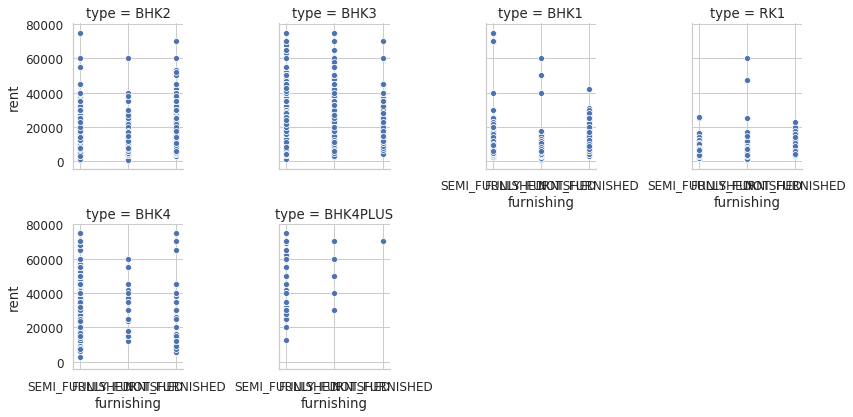

In [25]:
# Multi variable plots

cond_plot = sb.FacetGrid(data=final_result_data, col='type', col_wrap=4)
cond_plot.map(sb.scatterplot, 'furnishing', 'rent')

plt.show()

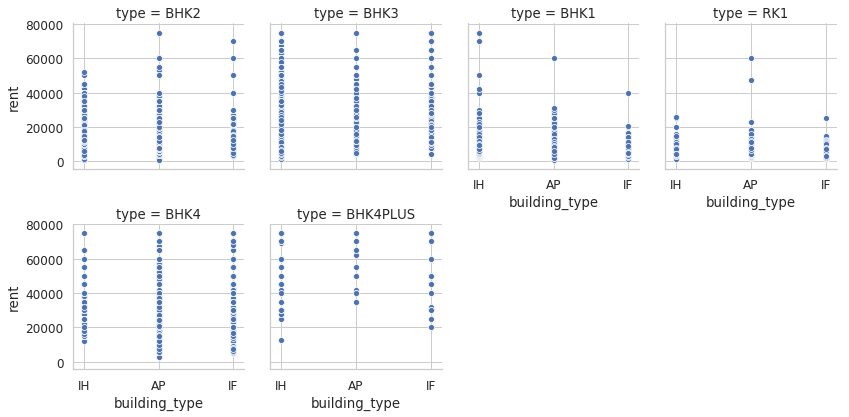

In [26]:
# Multi variable plots

cond_plot = sb.FacetGrid(data=final_result_data, col='type', col_wrap=4)
cond_plot.map(sb.scatterplot, 'building_type', 'rent')

plt.show()

In [14]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# data = pd.read_excel('property_result_data.xlsx')
data = final_result_data

# Filling null values

data['number_of_interaction'].fillna(0,inplace=True)
data['total_floor'].fillna(data['floor'],inplace=True)
# data['total_floor'].interpolate(method='linear', inplace=True)
building_types = data['building_type'].value_counts()
max_building_type = ''
for key,value in building_types.items():
    max_building_type = key
    break
data['building_type'].fillna(max_building_type ,inplace = True)

print(data.isna().sum())

# one_hot_encoder = OneHotEncoder()


property_id                  0
photo_urls               11022
photo_count                  0
type                         0
activation_date              0
bathroom                     0
floor                        0
total_floor                  0
furnishing                   0
gym                          0
lease_type                   0
lift                         0
locality                     0
parking                      0
property_age                 0
property_size                0
swimming_pool                0
pin_code                   325
rent                         0
deposit                      0
building_type                0
number_of_interaction        0
dtype: int64


In [15]:
# Iterative label encoding

data = data.drop(columns=['property_id','activation_date','photo_urls','pin_code'])
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

types = data.dtypes

str_columns = []
col_number = 0
for col,val in types.items():
    if val == 'object':
        print(col,val,col_number)
        str_columns.append(col_number)
    col_number = col_number + 1

for number in str_columns:
    label_encoder = LabelEncoder()
#     X[:,[1,3,5,7,8]] = label_encoder.fit_transform(X[:,[1,3,5,7,8]])
#     print(X[3])
    X[:,number] = label_encoder.fit_transform(X[:,number])
    print(X[3])
print(X[3])

type object 1
furnishing object 5
lease_type object 7
locality object 9
parking object 10
building_type object 16
[0 2 2 3 4.0 'SEMI_FURNISHED' 0 'ANYONE' 0 'Arakere' 'BOTH' 1 1300 0 17000
 150000 'AP']
[0 2 2 3 4.0 2 0 'ANYONE' 0 'Arakere' 'BOTH' 1 1300 0 17000 150000 'AP']
[0 2 2 3 4.0 2 0 0 0 'Arakere' 'BOTH' 1 1300 0 17000 150000 'AP']
[0 2 2 3 4.0 2 0 0 0 159 'BOTH' 1 1300 0 17000 150000 'AP']
[0 2 2 3 4.0 2 0 0 0 159 0 1 1300 0 17000 150000 'AP']
[0 2 2 3 4.0 2 0 0 0 159 0 1 1300 0 17000 150000 0]
[0 2 2 3 4.0 2 0 0 0 159 0 1 1300 0 17000 150000 0]


In [16]:
# Iterative OneHot encoding
onehot_encoder = OneHotEncoder(categorical_features = str_columns)
X = onehot_encoder.fit_transform(X).toarray()

/home/venkatakrishna/anaconda3/envs/test_env/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/venkatakrishna/anaconda3/envs/test_env/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [17]:
'''
# Correlation to find best features
t will automatically build, test, and deploy your application based on a predefined CI/CD configuration.


# num_df=df.select_dtypes(include=['integer','float'])
df = pd.DataFrame(data=X)
df1 = pd.DataFrame(data=Y,columns=['output'])
data = pd.concat([df,df1],axis=1)
print(data.head())
# print(data[0])
corr_output=data.corr()['output'].abs()
print(corr_output)
    #keeping only columns that have correlation with target higher than threshold
data = data.drop(corr_output[corr_output<0.01].index, axis=1)
print(data.head())


X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

'''
# PCA dimentionality reduction technique

from sklearn.decomposition import PCA
pca = PCA(n_components=30)
print(X.shape)
X = pca.fit_transform(X)
print(X.shape)

'''
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, 10, step=1)
selector = selector.fit(X, Y)
print(selector.support_) 
print(selector.ranking_)
'''

(28888, 2399)
(28888, 30)


'\nfrom sklearn.feature_selection import RFE\nfrom sklearn.svm import SVR\nestimator = SVR(kernel="linear")\nselector = RFE(estimator, 10, step=1)\nselector = selector.fit(X, Y)\nprint(selector.support_) \nprint(selector.ranking_)\n'

In [18]:
Y.shape

(28888,)

In [19]:
X.shape

(28888, 30)

In [33]:
# Splitting data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [34]:
# Feature scaling
from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler()

X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

sc_y = StandardScaler()

Y_train = np.reshape(Y_train,(-1,1))
Y_train = sc_y.fit_transform(Y_train)



In [35]:
print(X_train.shape)
print(Y_train.shape)
print(Y_train)

(23110, 30)
(23110, 1)
[[-0.09422296]
 [ 0.11156975]
 [ 0.52315516]
 ...
 [-0.40291202]
 [-0.50580837]
 [ 0.00867339]]


In [36]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10)
regressor.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = regressor.predict(X_test)

/home/venkatakrishna/anaconda3/envs/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [40]:
# Inverse tranform
Y_pred = sc_y.inverse_transform(Y_pred)

In [41]:
Y_pred

array([ 5.7,  0.3,  4.5, ...,  2.2,  3.6, 10.2])

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_test,Y_pred))

In [43]:
rmse

9.754817161445926

In [31]:
Y_test

array([24.,  2.,  0., ...,  3.,  5.,  5.])

In [32]:
Y_pred

array([ 5.5,  2.2,  5.3, ...,  3.3,  4.6, 10.3])